# Dataset Generation

In [2]:
import pandas as pd

import sys
sys.path.append( '../src/' )

from ml.preprocessing import *

In [3]:
%%time
sheets = [ 'Friday 15 May', 'Sunday 24 May', 'Monday 25 May', 'Tuesday 26 May', 
          'Wednesday 27 May', 'Thursday 28 May', 'Friday 29 May', 'Sunday May 31', 
          'Monday June 1', 'Thursday June 4', 'Friday June 5' ]

df = read_sheets( '../datasets/dataset-residential.xlsx', sheets )
df

CPU times: user 46.5 s, sys: 491 ms, total: 47 s
Wall time: 47.4 s


,pre,alt,hum,tem,ven,occ
date,,,,,,
2020-05-14 21:08:39,94270.77,604.60,54.49,30.99,1.0,L
2020-05-14 21:08:40,94268.36,604.81,54.46,30.99,1.0,L
2020-05-14 21:08:41,94266.11,605.01,54.46,30.99,1.0,L
2020-05-14 21:08:42,94268.52,604.80,54.49,30.99,1.0,L
2020-05-14 21:08:43,94269.70,604.69,54.50,30.99,1.0,L
...,...,...,...,...,...,...
2020-06-05 10:01:23,94731.69,563.99,61.02,30.35,NaN,NaN
2020-06-05 10:01:24,94732.08,563.96,61.01,30.35,NaN,NaN
2020-06-05 10:01:25,94729.84,564.25,61.01,30.35,NaN,NaN


## Removing null values

In [4]:
print( 'Legnth: ', len( df ) )
print( 'Null values:' )
len( df ) - df.count()

Legnth:  353712
Null values:


pre        0
alt        0
hum       97
tem        0
ven    57819
occ    57819
dtype: int64

In [5]:
df = df.dropna( axis = 0, subset = [ 'occ', 'hum' ], thresh = 2 )

In [6]:
print( 'Legnth: ', len( df ) )
print( 'Null values:' )
len( df ) - df.count()

Legnth:  295823
Null values:


pre    0
alt    0
hum    0
tem    0
ven    0
occ    0
dtype: int64

In [7]:
df.to_csv( '../datasets/dataset-residential.csv' )

## Visualization

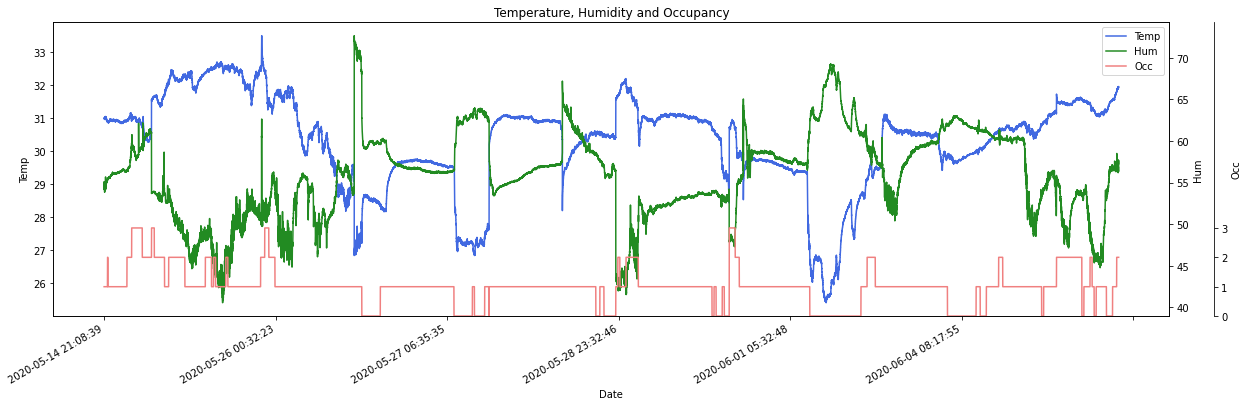

CPU times: user 2min 12s, sys: 789 ms, total: 2min 13s
Wall time: 2min 14s


In [9]:
%%time
plot_env_vars( df.index.astype( str ), df[ 'tem' ], df[ 'hum' ], df[ 'occ' ] )
# plot_single( df.index.astype( str ), df[ 'tem' ], 'Temperature' )
# plot_single( df.index.astype( str ), df[ 'hum' ], 'Humidity' )
# plot_single( df.index.astype( str ), df[ 'pre' ], 'Pressure' )